In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Q1

df.groupby(['JobRole','Attrition','DistanceFromHome']).agg({'DistanceFromHome':['count']})

DistanceFromHome
                                                                count
JobRole                   Attrition DistanceFromHome                 
Healthcare Representative No        1                              23
                                    2                              14
                                    3                               4
                                    4                               3
                                    5                               6
...                                                               ...
Sales Representative      Yes       19                              1
                                    20                              1
                                    21                              1
                                    22                              1
                                    24                              2

[329 rows x 1 columns]

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#Q2

df.groupby(['Education','Attrition']).agg({'MonthlyIncome':['mean']})

MonthlyIncome
                             mean
Education Attrition              
1         No          5926.129496
          Yes         4360.161290
2         No          6586.058824
          Yes         4282.545455
3         No          6882.919662
          Yes         4770.242424
4         No          7087.814706
          Yes         5335.155172
5         No          8559.906977
          Yes         5850.200000

# Assignment #3

Question 1 Plotting:

Corrected 

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# creating a new column that will be used to count
df['counted_employees'] = 1
dst_home = df.groupby(['DistanceFromHome','JobRole','Attrition'])['counted_employees'].count().reset_index()

In [104]:
dst_home.columns

Index(['DistanceFromHome', 'JobRole', 'Attrition', 'counted_employees'], dtype='object')

In [105]:
dst_home.head()

,DistanceFromHome,JobRole,Attrition,counted_employees
0,1,Healthcare Representative,No,23
1,1,Human Resources,No,8
2,1,Human Resources,Yes,1
3,1,Laboratory Technician,No,27
4,1,Laboratory Technician,Yes,4


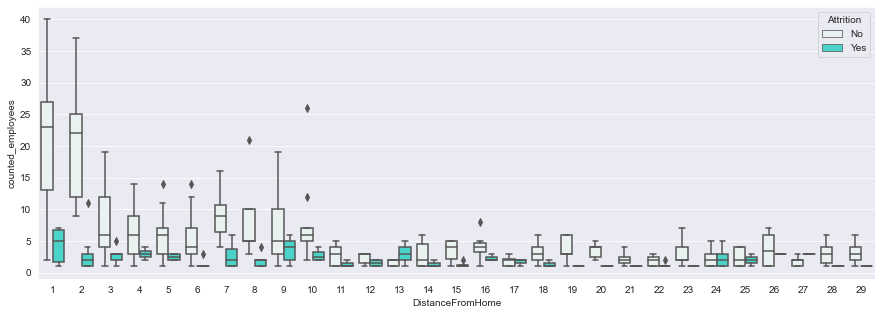

In [170]:
ax = sns.boxplot(x='DistanceFromHome', y='counted_employees', data = dst_home, hue = 'Attrition', color='#36E9DC')

[Text(0, 0, 'Healthcare Representative'),
 Text(1, 0, 'Human Resources'),
 Text(2, 0, 'Laboratory Technician'),
 Text(3, 0, 'Manager'),
 Text(4, 0, 'Manufacturing Director'),
 Text(5, 0, 'Research Director'),
 Text(6, 0, 'Research Scientist'),
 Text(7, 0, 'Sales Executive'),
 Text(8, 0, 'Sales Representative')]

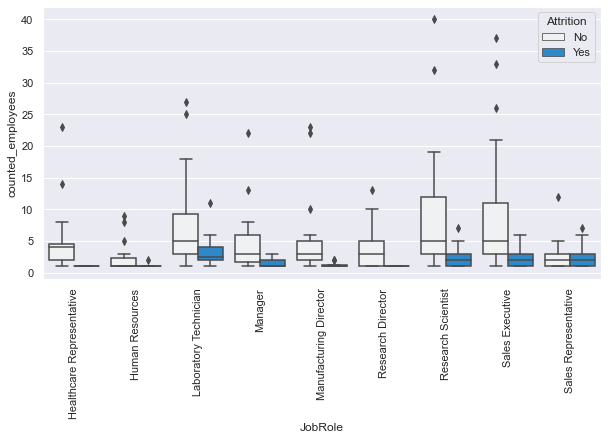

In [204]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.boxplot(x='JobRole', y='counted_employees', data = dst_home, hue = 'Attrition', color='#158DE2')
ax.set_xticklabels(dst_home['JobRole'].unique(), rotation=90)


### Question NUmber 2 Plotting

In [215]:
data = df.groupby(['Education','Attrition'])['MonthlyIncome'].mean().reset_index()

In [216]:
data.head()

,Education,Attrition,MonthlyIncome
0,1,No,5926.129496
1,1,Yes,4360.161290
2,2,No,6586.058824
3,2,Yes,4282.545455
4,3,No,6882.919662


In [221]:
data.dtypes

Education          int64
Attrition         object
MonthlyIncome    float64
dtype: object

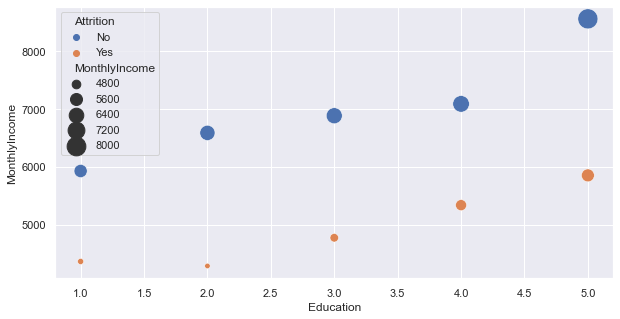

In [232]:
ax = sns.scatterplot(x='Education', y='MonthlyIncome', data = data, hue='Attrition', size='MonthlyIncome', sizes=(30,400))

From the above chart, the average income increases with education level. However, attrition was observed from those who earn little compared to those with the same level of education